In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import pandas as pd
import nltk
import re
from nextSentencePredictionCopy import checkNextSentenceCopy
from questionAskingDetectionCopy import checkQuestion
from shortSafeAnswerCopy import checkShortSafeResponse
from RepetitionMeasurementCopy import checkRepetitionInternal
from RepetitionMeasurementCopy import checkRepetitionPartner
from RepetitionMeasurementCopy import checkRepetitionExternal
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction
smoother = SmoothingFunction()

/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
Did not use initialization regex that was passed: .*token_embedder_tokens\._projection.*weight


In [3]:
df = pd.read_json ('data/summer_wild_evaluation_dialogs.json')
dfObj = pd.DataFrame(columns = ['id',
                                'statement', 
                                'response', 
                                'evalScore', 
                                'bleu', 
                                'nextSentence',
                                'internalRepetition',
                                'partnerRepetition', 
                                'externalRepetition',
                                'responseType',
                                'shortSafe',
                                'entailmentNLI',
                                'contradictionNLI',
                                'neutralNLI'])

pbar = tqdm(total=len(df))
for i in range(0, len(df)):
    history = ''
    if (df['eval_score'][i] != 'null'):
        if (len(df['dialog'][i])) > 2:
            if ((df['dialog'][i][0]['sender_class']) == 'Bot'):
                    skip_first = True
            for j in range (0, len(df['dialog'][i])):
                if skip_first:
                    skip_first = False
                else:
                    if ((df['dialog'][i][j]['sender_class']) == (df['dialog'][i][j-1]['sender_class'])):
                            continue
                    else:
                        if ((df['dialog'][i][j]['sender_class']) == 'Bot'):
                            if ((df['dialog'][i][j]['text']) != 'Text is not given. Please try to type /end and /test to reset the state and get text.'):
                                
                            
                                statement = (df['dialog'][i][j-1]['text'])
                                statement = re.sub(r'[^\w\s]','',statement)
                                statement = re.sub(r'\n', ' ', statement)
                                statement_list = statement.split()
                                statement_list = [[x.lower() for x in statement_list]]
                                
                                history = history + ' ' +statement
    
                                response = (df['dialog'][i][j]['text'])
                                response = re.sub(r'[^\w\s]','',response)
                                response_list = response.split()
                                response_list = [x.lower() for x in response_list]
                               
                                bleuScore = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.25,0.25),smoothing_function=smoother.method1),3)
                                nextSentence = checkNextSentenceCopy.checkNextSentence(statement, response)
                                responseType = checkQuestion.checkQuestionStatement(response)
                                shortSafe = checkShortSafeResponse.checkShortSafe(statement, response)
#                                 repetitionInternal = checkRepetitionInternal.check_internalRepetition(response)
#                                 repetitionPartner = checkRepetitionPartner.check_partnerRepetition(statement, response)
                                repetitionInternal = checkRepetitionInternal.intrep_repeated_ngram_frac(response, 1)
                                repetitionPartner = checkRepetitionPartner.partnerrep_repeated_ngram_frac(statement, response, 2)
                                repetitionExternal= checkRepetitionExternal.extrep_repeated_ngram_frac(history, response, 2)
#                                 nliEntailment, nliContradiction, nliNeutral = (checkNextSentenceCopy.checkNLI(_hypothesis=response, _premise=statement))
                
                                dfObj = dfObj.append({'id': i, 
                                                      'statement': df['dialog'][i][j-1]['text'], 
                                                      'response': df['dialog'][i][j]['text'], 
                                                      'bleu': bleuScore, 
                                                      'nextSentence': nextSentence, 
                                                      'responseType':  responseType, 
                                                      'shortSafe': shortSafe, 
                                                      'internalRepetition': repetitionInternal, 
                                                      'partnerRepetition': repetitionPartner, 
                                                      'externalRepetition': repetitionExternal, 
#                                                       'entailmentNLI': nliEntailment,
#                                                       'contradictionNLI': nliContradiction,
#                                                       'neutralNLI': nliNeutral,
                                                      'evalScore': df['eval_score'][i]
                                                     }, 
                                                     ignore_index=True)
                        else:
                            continue
    pbar.update(1)
pbar.close()    
dfObj.to_csv('data/summer_wild_evaluation_dialogs_final.csv', encoding='utf-8', index=False)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [ ]:
# Experimenting with BLEU score weights

In [32]:
df = pd.read_json ('data/summer_wild_evaluation_dialogs.json')
dfObj = pd.DataFrame(columns = ['id',
                                'statement', 
                                'response', 
                                'evalScore', 
                                'bleu', 
                                ])

pbar = tqdm(total=len(df))
for i in range(0, len(df)):
    history = ''
    if (df['eval_score'][i] != 'null'):
        if (len(df['dialog'][i])) > 2:
            if ((df['dialog'][i][0]['sender_class']) == 'Bot'):
                    skip_first = True
            for j in range (0, len(df['dialog'][i])):
                if skip_first:
                    skip_first = False
                else:
                    if ((df['dialog'][i][j]['sender_class']) == (df['dialog'][i][j-1]['sender_class'])):
                            continue
                    else:
                        if ((df['dialog'][i][j]['sender_class']) == 'Bot'):
                            if ((df['dialog'][i][j]['text']) != 'Text is not given. Please try to type /end and /test to reset the state and get text.'):
                                
                            
                                statement = (df['dialog'][i][j-1]['text'])
                                statement = re.sub(r'[^\w\s]','',statement)
                                statement = re.sub(r'\n', ' ', statement)
                                statement_list = statement.split()
                                statement_list = [[x.lower() for x in statement_list]]
                                
                                history = history + ' ' +statement
    
                                response = (df['dialog'][i][j]['text'])
                                response = re.sub(r'[^\w\s]','',response)
                                response_list = response.split()
                                response_list = [x.lower() for x in response_list]
                               
                                bleuScore_0 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0,0),smoothing_function=smoother.method3),3)
                                bleuScore_0_1 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.1,0.1),smoothing_function=smoother.method3),3)
                                bleuScore_0_2 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.2,0.2),smoothing_function=smoother.method3),3)
                                bleuScore_0_3 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.3,0.3),smoothing_function=smoother.method3),3)
                                bleuScore_0_4 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.4,0.4),smoothing_function=smoother.method3),3)
                                bleuScore_0_5 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.5,0.5),smoothing_function=smoother.method3),3)
                                bleuScore_0_6 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.6,0.6),smoothing_function=smoother.method3),3)
                                bleuScore_0_7 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.7,0.7),smoothing_function=smoother.method3),3)
                                bleuScore_0_8 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.8,0.8),smoothing_function=smoother.method3),3)
                                bleuScore_0_9 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.9,0.9),smoothing_function=smoother.method3),3)
                                bleuScore_1 = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(1,0.1),smoothing_function=smoother.method3),3)
                                
                                
#                                 responseType = checkQuestion.checkQuestionStatement(response)
#                                 shortSafe = checkShortSafeResponse.checkShortSafe(statement, response)
# #                                 repetitionInternal = checkRepetitionInternal.check_internalRepetition(response)
# #                                 repetitionPartner = checkRepetitionPartner.check_partnerRepetition(statement, response)
#                                 repetitionInternal = checkRepetitionInternal.intrep_repeated_ngram_frac(response, 1)
#                                 repetitionPartner = checkRepetitionPartner.partnerrep_repeated_ngram_frac(statement, response, 2)
#                                 repetitionExternal= checkRepetitionExternal.extrep_repeated_ngram_frac(history, response, 2)
# #                                 nliEntailment, nliContradiction, nliNeutral = (checkNextSentenceCopy.checkNLI(_hypothesis=response, _premise=statement))
                
                                dfObj = dfObj.append({'id': i, 
                                                      'statement': df['dialog'][i][j-1]['text'], 
                                                      'response': df['dialog'][i][j]['text'], 
                                                      'bleu_0': bleuScore_0,
                                                      'bleu_0.1': bleuScore_0_1, 
                                                      'bleu_0.2': bleuScore_0_2, 
                                                      'bleu_0.3': bleuScore_0_3, 
                                                      'bleu_0.4': bleuScore_0_4, 
                                                      'bleu_0.5': bleuScore_0_5, 
                                                      'bleu_0.6': bleuScore_0_6, 
                                                      'bleu_0.7': bleuScore_0_7, 
                                                      'bleu_0.8': bleuScore_0_8, 
                                                      'bleu_0.9': bleuScore_0_9, 
                                                      'bleu_1': bleuScore_1, 
                                                      'evalScore': df['eval_score'][i]
                                                     }, 
                                                     ignore_index=True)
                        else:
                            continue
    pbar.update(1)
pbar.close()    
dfObj.to_csv('data/summer_wild_evaluation_dialogs_bleu.csv', encoding='utf-8', index=False)

In [ ]:
#Correlation between BLEU with smoothing 1 and Eval Score

In [21]:
full_data_final = pd.read_csv('data/summer_wild_evaluation_dialogs_bleu.csv', error_bad_lines=False)
del full_data_final['id']
full_data_final.corr(method ='pearson') 

,evalScore,bleu,bleu_0,bleu_0.1,bleu_0.2,bleu_0.3,bleu_0.4,bleu_0.5,bleu_0.6,bleu_0.7,bleu_0.8,bleu_0.9,bleu_1
evalScore,1.000000,NaN,0.060873,0.055419,0.045418,0.033849,0.023425,0.015026,0.008451,0.003483,-0.000433,-0.003480,0.031422
bleu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bleu_0,0.060873,NaN,1.000000,0.964156,0.861302,0.726486,0.598195,0.492408,0.409891,0.346769,0.296712,0.257637,0.620524
bleu_0.1,0.055419,NaN,0.964156,1.000000,0.964578,0.879232,0.780219,0.688482,0.609936,0.544431,0.488458,0.441166,0.785757
bleu_0.2,0.045418,NaN,0.861302,0.964578,1.000000,0.973173,0.914503,0.847508,0.782409,0.722547,0.667365,0.617381,0.900728
bleu_0.3,0.033849,NaN,0.726486,0.879232,0.973173,1.000000,0.982560,0.944391,0.898337,0.850236,0.801907,0.755018,0.952106
bleu_0.4,0.023425,NaN,0.598195,0.780219,0.914503,0.982560,1.000000,0.988705,0.962553,0.928740,0.890613,0.850609,0.958013
bleu_0.5,0.015026,NaN,0.492408,0.688482,0.847508,0.944391,0.988705,1.000000,0.992071,0.972628,0.945814,0.914491,0.940075
bleu_0.6,0.008451,NaN,0.409891,0.609936,0.782409,0.898337,0.962553,0.992071,1.000000,0.993964,0.978413,0.956356,0.910886
bleu_0.7,0.003483,NaN,0.346769,0.544431,0.722547,0.850236,0.928740,0.972628,0.993964,1.000000,0.995092,0.982240,0.876844


In [ ]:
#Correlation between BLEU with smoothing 2 and Eval Score

In [27]:
full_data_final = pd.read_csv('data/summer_wild_evaluation_dialogs_bleu.csv', error_bad_lines=False)
del full_data_final['id']
full_data_final.corr(method ='pearson') 

,evalScore,bleu,bleu_0,bleu_0.1,bleu_0.2,bleu_0.3,bleu_0.4,bleu_0.5,bleu_0.6,bleu_0.7,bleu_0.8,bleu_0.9,bleu_1
evalScore,1.000000,NaN,0.060873,0.058917,0.055260,0.050226,0.044294,0.037984,0.031734,0.025871,0.020602,0.015911,0.042579
bleu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bleu_0,0.060873,NaN,1.000000,0.988961,0.955498,0.901932,0.833260,0.756464,0.677183,0.601090,0.531408,0.468147,0.766555
bleu_0.1,0.058917,NaN,0.988961,1.000000,0.988545,0.955293,0.904067,0.841030,0.771869,0.702397,0.636379,0.574611,0.848045
bleu_0.2,0.055260,NaN,0.955498,0.988545,1.000000,0.988860,0.957575,0.911234,0.855298,0.795493,0.735975,0.678275,0.914220
bleu_0.3,0.050226,NaN,0.901932,0.955293,0.988860,1.000000,0.989700,0.961804,0.921285,0.873570,0.823018,0.771780,0.960051
bleu_0.4,0.044294,NaN,0.833260,0.904067,0.957575,0.989700,1.000000,0.990985,0.966950,0.932840,0.893028,0.850136,0.984235
bleu_0.5,0.037984,NaN,0.756464,0.841030,0.911234,0.961804,0.990985,1.000000,0.992318,0.972288,0.944127,0.910754,0.988265
bleu_0.6,0.031734,NaN,0.677183,0.771869,0.855298,0.921285,0.966950,0.992318,1.000000,0.993670,0.977272,0.953873,0.975991
bleu_0.7,0.025871,NaN,0.601090,0.702397,0.795493,0.873570,0.932840,0.972288,0.993670,1.000000,0.994841,0.981283,0.951906


In [33]:
#Correlation between BLEU with smoothing 3 and Eval Score

In [34]:
full_data_final = pd.read_csv('data/summer_wild_evaluation_dialogs_bleu.csv', error_bad_lines=False)
del full_data_final['id']
full_data_final.corr(method ='pearson') 

,evalScore,bleu,bleu_0,bleu_0.1,bleu_0.2,bleu_0.3,bleu_0.4,bleu_0.5,bleu_0.6,bleu_0.7,bleu_0.8,bleu_0.9,bleu_1
evalScore,1.000000,NaN,0.060873,0.058352,0.053230,0.046157,0.038165,0.030324,0.023189,0.017173,0.012245,0.008187,0.035244
bleu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bleu_0,0.060873,NaN,1.000000,0.982681,0.929447,0.845834,0.744411,0.639830,0.542707,0.458462,0.388228,0.330346,0.646385
bleu_0.1,0.058352,NaN,0.982681,1.000000,0.981432,0.928392,0.850684,0.762053,0.673964,0.593409,0.523119,0.462834,0.766620
bleu_0.2,0.053230,NaN,0.929447,0.981432,1.000000,0.982157,0.934188,0.867975,0.795098,0.723693,0.657953,0.599049,0.868454
bleu_0.3,0.046157,NaN,0.845834,0.928392,0.982157,1.000000,0.984369,0.944562,0.891500,0.833898,0.777070,0.723463,0.939175
bleu_0.4,0.038165,NaN,0.744411,0.850684,0.934188,0.984369,1.000000,0.987419,0.956299,0.915338,0.870551,0.825369,0.975359
bleu_0.5,0.030324,NaN,0.639830,0.762053,0.867975,0.944562,0.987419,1.000000,0.990346,0.966704,0.935366,0.900391,0.981078
bleu_0.6,0.023189,NaN,0.542707,0.673964,0.795098,0.891500,0.956299,0.990346,1.000000,0.992727,0.974781,0.950544,0.965047
bleu_0.7,0.017173,NaN,0.458462,0.593409,0.723693,0.833898,0.915338,0.966704,0.992727,1.000000,0.994471,0.980625,0.935943


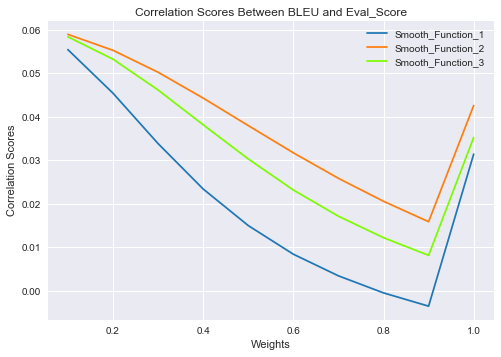

In [55]:
weights = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
smooth_function_1 = [0.055419, 0.045418, 0.033849, 0.023425, 0.015026, 0.008451, 0.003483, -0.000433, -0.003480, 0.031422]
smooth_function_2 = [0.058917, 0.055260, 0.050226, 0.044294, 0.037984, 0.031734, 0.025871, 0.020602, 0.015911, 0.042579]
smooth_function_3 = [0.058352, 0.053230, 0.046157, 0.038165, 0.030324, 0.023189, 0.017173, 0.012245, 0.008187, 0.035244]
plt.plot(weights, smooth_function_1, color='tab:blue', label='Smooth_Function_1')
plt.plot(weights, smooth_function_2, color='tab:orange', label='Smooth_Function_2')
plt.plot(weights, smooth_function_3, color='lawngreen', label='Smooth_Function_3')
plt.xlabel('Weights')
plt.ylabel('Correlation Scores')
plt.legend(loc='upper right')
plt.title('Correlation Scores Between BLEU and Eval_Score')
# plt.savefig("bleuWeightsCorrelation.pdf")
plt.show()

In [ ]:
# End of experiment with BLEU

In [ ]:
# Plotting next sentence on graph for multi-turn

In [2]:
df = pd.read_json ('data/summer_wild_evaluation_dialogs.json')
dfObj = pd.DataFrame(columns = ['id',
                                'statement', 
                                'response', 
                                'evalScore',
                                'nextSentence'])

pbar = tqdm(total=len(df))
for i in range(0, len(df)):
    history = ''
    if (df['eval_score'][i] != 'null'):
        if (len(df['dialog'][i])) > 2:
            if ((df['dialog'][i][0]['sender_class']) == 'Bot'):
                    skip_first = True
            for j in range (0, len(df['dialog'][i])):
                if skip_first:
                    skip_first = False
                else:
                    if ((df['dialog'][i][j]['sender_class']) == (df['dialog'][i][j-1]['sender_class'])):
                            continue
                    else:
                        if ((df['dialog'][i][j]['sender_class']) == 'Bot'):
                            if ((df['dialog'][i][j]['text']) != 'Text is not given. Please try to type /end and /test to reset the state and get text.'):
                                
                            
                                statement = (df['dialog'][i][j-1]['text'])
                                statement = re.sub(r'[^\w\s]','',statement)
                                statement = re.sub(r'\n', ' ', statement)
                                statement_list = statement.split()
                                statement_list = [[x.lower() for x in statement_list]]
                                
                                history = history + ' ' +statement
    
                                response = (df['dialog'][i][j]['text'])
                                response = re.sub(r'[^\w\s]','',response)
                                response_list = response.split()
                                response_list = [x.lower() for x in response_list]
                               
                                nextSentence = checkNextSentenceCopy.checkNextSentence(statement, response)
                                
                                dfObj = dfObj.append({'id': i, 
                                                      'statement': df['dialog'][i][j-1]['text'], 
                                                      'response': df['dialog'][i][j]['text'], 
                                                      'nextSentence': nextSentence, 
                                                      'evalScore': df['eval_score'][i]
                                                     }, 
                                                     ignore_index=True)
                        else:
                            continue
    pbar.update(1)
pbar.close()    
dfObj.to_csv('data/summer_wild_evaluation_dialogs_BERT.csv', encoding='utf-8', index=False)

In [22]:
r = csv.reader(open('data/summer_wild_evaluation_dialogs_BERT.csv'))
next(r)
lines = list(r)

count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0

pbar = tqdm(total=len(lines))
for row in lines:
    if ((row[3]) == '1.0'):
        count_1 = count_1+1
    elif ((row[3]) == '2.0'):
        count_2 = count_2+1
    elif ((row[3]) == '3.0'):
        count_3 = count_3+1
    elif ((row[3]) == '4.0'):
        count_4 = count_4+1
    elif ((row[3]) == '5.0'):
        count_5 = count_5+1
    pbar.update(1)
pbar.close()

# writer = csv.writer(open('data/full_dataset_output_final.csv', 'w'))
# writer.writerows(lines)

In [23]:
count_5

2734

In [37]:
positive_Predictions =  dfObj['nextSentence']=='1'
positive_Rows = dfObj[positive_Predictions]

positive_Rows_1 = positive_Rows['evalScore'] == 1.0
positive_Rows_1 = positive_Rows[positive_Rows_1]
positive_Rows_1 = positive_Rows_1.shape

positive_Rows_1

(1427, 5)

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
X = np.arange(4)

#All Reviews Plot
# full_data['Turkey6'].plot(kind='hist', bins=100, label='ALL', color="yellow")
plt.title('Reviews Frequency - All Predictions')
plt.xlabel('Turkers Reviews')

#Positive Reviews Plot
positive_Predictions =  dfObj['nextSentence']=='1'
positive_Rows = dfObj[positive_Predictions]

positive_Rows_1 = positive_Rows['evalScore'] == 1.0
positive_Rows_1 = positive_Rows[positive_Rows_1]
positive_Rows_1 = positive_Rows_1.shape

positive_Rows_2 = positive_Rows['evalScore'] == 2.0
positive_Rows_2 = positive_Rows[positive_Rows_2]
positive_Rows_2 = positive_Rows_2.shape

positive_Rows_3 = positive_Rows['evalScore'] == 3.0
positive_Rows_3 = positive_Rows[positive_Rows_3]
positive_Rows_3 = positive_Rows_3.shape

positive_Rows_4 = positive_Rows['evalScore'] == 4.0
positive_Rows_4 = positive_Rows[positive_Rows_4]
positive_Rows_4 = positive_Rows_4.shape

positive_Rows_5 = positive_Rows['evalScore'] == 5.0
positive_Rows_5 = positive_Rows[positive_Rows_5]
positive_Rows_5 = positive_Rows_5.shape


x = {1:(positive_Rows_1[0]/count_1)*100, 2:(positive_Rows_2[0]/count_2)*100, 3:(positive_Rows_3[0]/count_3)*100, 4:(positive_Rows_4[0]/count_4)*100, 5:(positive_Rows_5[0]/count_5)*100}

keys = np.array([1,2,3,4,5])
vals = x.values()

bar1 = plt.bar(keys-0.125, vals, label="Percentage of Positive", color='limegreen', alpha = 0.7, width=0.25)


#Negative Reviews Plot
negative_Predictions =  dfObj['nextSentence']=='0'
negative_Rows = dfObj[negative_Predictions]
negative_Rows_1 = negative_Rows['evalScore'] == 1.0
negative_Rows_1 = negative_Rows[negative_Rows_1]
negative_Rows_1 = negative_Rows_1.shape

negative_Rows_2 = negative_Rows['evalScore'] == 2.0
negative_Rows_2 = negative_Rows[negative_Rows_2]
negative_Rows_2 = negative_Rows_2.shape

negative_Rows_3 = negative_Rows['evalScore'] == 3.0
negative_Rows_3 = negative_Rows[negative_Rows_3]
negative_Rows_3 = negative_Rows_3.shape

negative_Rows_4 = negative_Rows['evalScore'] == 4.0
negative_Rows_4 = negative_Rows[negative_Rows_4]
negative_Rows_4 = negative_Rows_4.shape

negative_Rows_5 = negative_Rows['evalScore'] == 5.0
negative_Rows_5 = negative_Rows[negative_Rows_5]
negative_Rows_5 = negative_Rows_5.shape


x = {1:(negative_Rows_1[0]/count_1)*100, 2:(negative_Rows_2[0]/count_2)*100, 3:(negative_Rows_3[0]/count_3)*100, 4:(negative_Rows_4[0]/count_4)*100, 5:(negative_Rows_5[0]/count_5)*100}

keys = np.array([1,2,3,4,5])
vals = x.values()

plt.bar(keys+0.125, vals, label="Percentage of Negative", color='red', alpha=0.7, width=0.25)

plt.ylim(0,100)
plt.ylabel ('Percentage')
plt.xlabel ('Reviews')
plt.xticks(list(keys))
plt.legend (bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.)
# plt.show()
plt.savefig('bertMultiTurnPredictions.pdf')

In [6]:
full_data_final = pd.read_csv('data/summer_wild_evaluation_dialogs_final.csv', error_bad_lines=False)
del full_data_final['id']
full_data_final.corr(method ='pearson') 

,evalScore,bleu,nextSentence,internalRepetition,partnerRepetition,externalRepetition,shortSafe,nli
evalScore,1.000000,0.039610,0.044084,-0.053297,-0.002120,-0.024713,-0.005368,NaN
bleu,0.039610,1.000000,0.423162,0.060421,0.725067,0.454721,0.116430,NaN
nextSentence,0.044084,0.423162,1.000000,0.069261,0.247994,0.157766,0.048183,NaN
internalRepetition,-0.053297,0.060421,0.069261,1.000000,0.034613,0.046457,0.111714,NaN
partnerRepetition,-0.002120,0.725067,0.247994,0.034613,1.000000,0.595927,0.050670,NaN
externalRepetition,-0.024713,0.454721,0.157766,0.046457,0.595927,1.000000,0.050339,NaN
shortSafe,-0.005368,0.116430,0.048183,0.111714,0.050670,0.050339,1.000000,NaN
nli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Classifier on Single-Turn Data

In [26]:
dfObj = pd.DataFrame(columns = ['id',
                                'statement', 
                                'response', 
                                'evalScore',
                                'bleuScore',
                                'nextSentence',
                                'internalRepetition',
                                'partnerRepetition', 
                                'shortSafe',])

r = csv.reader(open('data/full_dataset.csv'))
header = next(r)
lines = list(r)

pbar = tqdm(total=len(lines))
for row in lines:
    
    statement = (row[0])
    statement = re.sub(r'[^\w\s]','',statement)
    statement = re.sub(r'\n', ' ', statement)
    statement_list = statement.split()
    statement_list = [[x.lower() for x in statement_list]]

    response = (row[1])
    response = re.sub(r'[^\w\s]','',response)
    response_list = response.split()
    response_list = [x.lower() for x in response_list]

    bleuScore = round(nltk.translate.bleu_score.sentence_bleu(statement_list, response_list,weights=(0.25,0.25),smoothing_function=smoother.method1),3)
    nextSentence = checkNextSentenceCopy.checkNextSentence(statement, response)
    shortSafe = checkShortSafeResponse.checkShortSafe(statement, response)
    repetitionInternal = checkRepetitionInternal.intrep_repeated_ngram_frac(response, 1)
    repetitionPartner = checkRepetitionPartner.partnerrep_repeated_ngram_frac(statement, response, 2)

    dfObj = dfObj.append({'id': row[2], 
                          'statement': row[0], 
                          'response': row[1], 
                          'bleuScore': bleuScore, 
                          'nextSentence': nextSentence, 
                          'shortSafe': shortSafe, 
                          'internalRepetition': repetitionInternal, 
                          'partnerRepetition': repetitionPartner,
                          'evalScore': row[8]
                         }, 
                         ignore_index=True)
    pbar.update(1)
pbar.close()
 
dfObj.to_csv('data/single_turn_evaluation.csv', encoding='utf-8', index=False)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [457]:
full_data_final = pd.read_csv('data/single_turn_evaluation.csv', error_bad_lines=False)
del full_data_final['id']
full_data_final.corr(method ='pearson') 

,evalScore,bleuScore,nextSentence,internalRepetition,partnerRepetition,shortSafe
evalScore,1.000000,0.057370,0.298645,-0.089245,0.074957,-0.089321
bleuScore,0.057370,1.000000,0.262709,0.143737,0.510979,0.213382
nextSentence,0.298645,0.262709,1.000000,-0.000845,0.147109,-0.027670
internalRepetition,-0.089245,0.143737,-0.000845,1.000000,0.097052,0.144386
partnerRepetition,0.074957,0.510979,0.147109,0.097052,1.000000,0.051151
shortSafe,-0.089321,0.213382,-0.027670,0.144386,0.051151,1.000000


In [468]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [459]:
data_raw = pd.read_csv('data/single_turn_evaluation_edited.csv',skiprows=1,header=None,names = ['id','statement','response','evalScore','bleuScore','nextSentence','internalRepetition','partnerRepetition','shortSafe'])

In [460]:
data = data_raw.drop(columns=['id','statement','response','bleuScore'])
data.head()

,evalScore,nextSentence,internalRepetition,partnerRepetition,shortSafe
0,3,0.302068,0.0,0.0,1
1,4,0.551756,0.0,0.0,1
2,3,0.047506,0.0,0.0,1
3,4,0.499853,0.0,0.0,0
4,4,0.795303,0.1,0.2,1


In [461]:
x = data.drop(columns=['evalScore'])
y = data['evalScore']

In [462]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=0)

In [463]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3965, 4), (3965,), (441, 4), (441,))

Accuracy of SVM classifier on training set: 0.50
Accuracy of SVM classifier on test set: 0.52


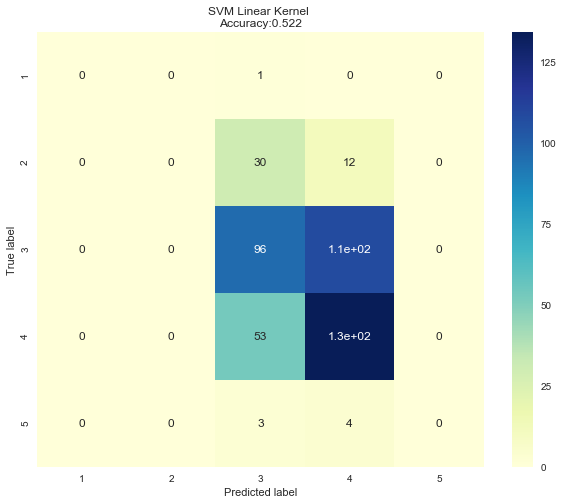

F1-Score:  0.21967424440379757
Precision:  0.20879400177913335
Recall:  0.23743315508021387


/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [471]:
from sklearn.svm import LinearSVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

svm.predict(x_train)
y_pred = svm.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('F1-Score: ',f1_score(y_test, y_pred, average="macro"))
print('Precision: ',precision_score(y_test, y_pred, average="macro"))
print('Recall: ',recall_score(y_test, y_pred, average="macro"))

# plt.savefig('classifierSingleSvm.pdf')

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.41


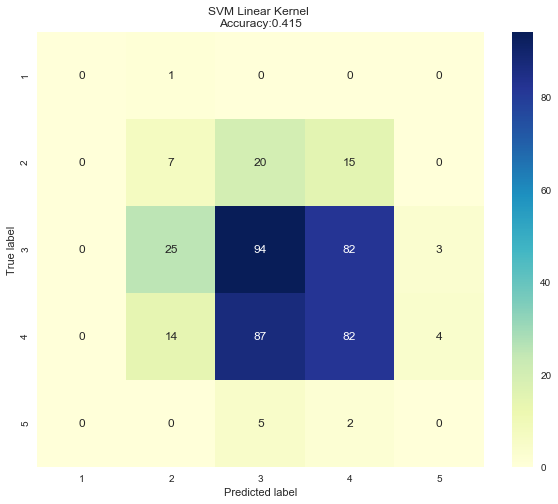

In [453]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf.predict(x_train)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# plt.savefig('classifierSingleDecisionTree.pdf')

Accuracy of LDA classifier on training set: 0.51
Accuracy of LDA classifier on test set: 0.53


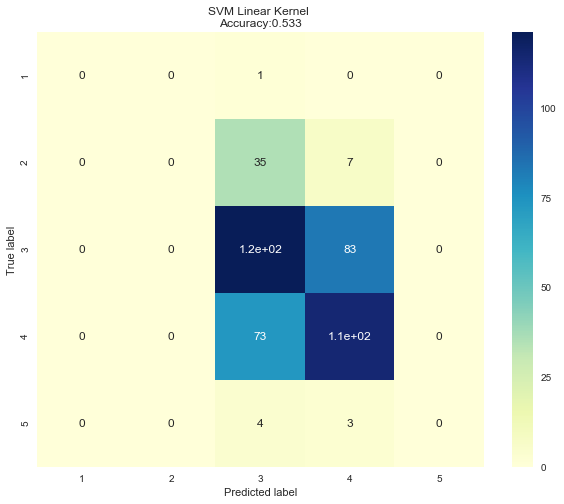

F1-Score:  0.22623832371415992
Precision:  0.21356373095503534
Recall:  0.24055258467023172


/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [472]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

lda.predict(x_train)
y_pred = lda.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('F1-Score: ',f1_score(y_test, y_pred, average="macro"))
print('Precision: ',precision_score(y_test, y_pred, average="macro"))
print('Recall: ',recall_score(y_test, y_pred, average="macro"))

# plt.savefig('classifierSingleLinearDiscriminant.pdf')

In [455]:
#Code to print the feature weights

In [456]:
features_names = ['nextSent', 'intRep', 'partRep','shortSafe']
df = pd.Series(abs(svm.coef_[0]), index=features_names).nlargest(5).plot(kind='barh')
df.plot()
plt.savefig('classifierSingleSVM_features.pdf')

Accuracy of K-NN classifier on training set: 0.63
Accuracy of K-NN classifier on test set: 0.45


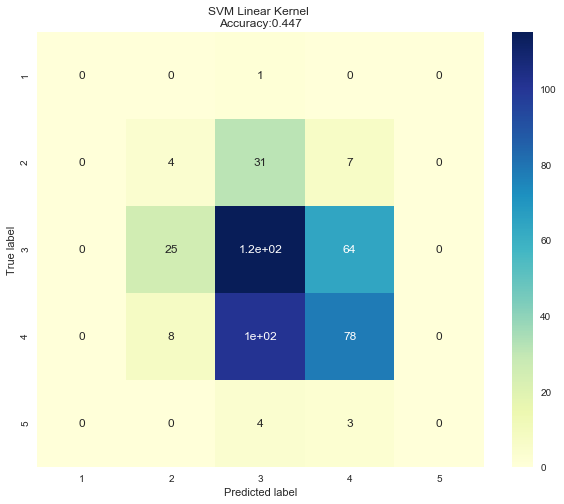

In [214]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

pred = knn.predict(x_test)
# print(x_test)
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

svm.predict(x_train)
y_pred = knn.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.94
Accuracy of Logistic regression classifier on test set: 0.44


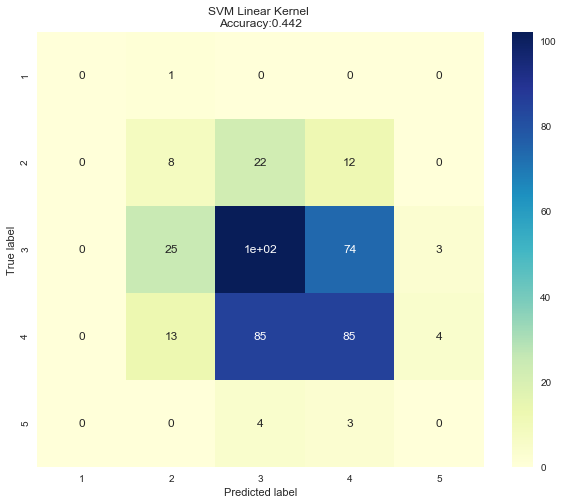

In [215]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(rf.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

svm.predict(x_train)
y_pred = rf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Accuracy of Logistic regression classifier on training set: 0.09
Accuracy of Logistic regression classifier on test set: 0.09


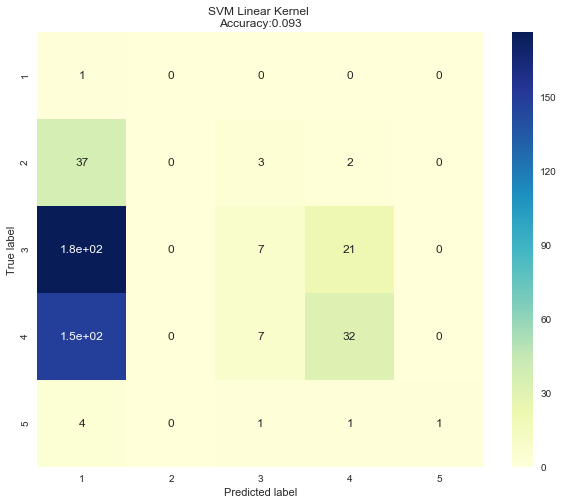

In [216]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

svm.predict(x_train)
y_pred = gnb.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Single - BLEU Results

In [379]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [380]:
data_raw = pd.read_csv('data/single_turn_evaluation_edited.csv',skiprows=1,header=None,names = ['id','statement','response','evalScore','bleuScore','nextSentence','internalRepetition','partnerRepetition','shortSafe'])

data = data_raw.drop(columns=['id','statement','response','nextSentence','internalRepetition','partnerRepetition','shortSafe'])
data.head()



,evalScore,bleuScore
0,3,0.000
1,4,0.000
2,3,0.000
3,4,0.000
4,4,0.398


/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.47
Accuracy of SVM classifier on test set: 0.46


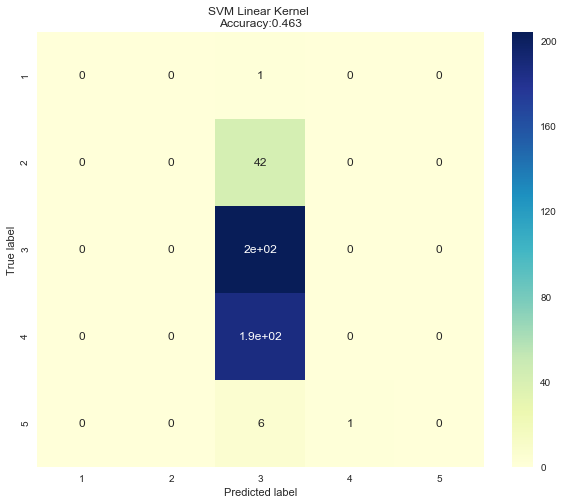

Accuracy of Decision Tree classifier on training set: 0.53
Accuracy of Decision Tree classifier on test set: 0.46
Accuracy of LDA classifier on training set: 0.48
Accuracy of LDA classifier on test set: 0.47


In [384]:
x = data.drop(columns=['evalScore'])
y = data['evalScore']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=0)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

svm.predict(x_train)
y_pred = svm.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# plt.savefig('bleuClassifierSingleLinearDiscriminant.pdf')


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_test, y_test)))

### Multi-Turn Classifiers

In [51]:
numbers = [1,1,2,3,1,4,5,2]
mostCommon = (max(set(numbers), key=numbers.count))
print(mostCommon)

1


In [18]:
evalScore = '1'
if evalScore is not None:
    print(evalScore)

1


In [361]:
r = csv.reader(open('data/summer_wild_evaluation_dialogs_final.csv'))
r  = pd.read_csv('data/summer_wild_evaluation_dialogs_final.csv',
                       skiprows=1,
                       header=None)

r.head(100)

,0,1,2,3,4,5,6,7,8,9,10
0,0,"Thats good for you, i'm not very into new tech",I am a college student and i am a college student,1.0,0.000,0.226343,0.5,0.0,0.0,Continuer,1
1,0,I am go to gym and live on donations,I am a vegan and i am in the midwest,1.0,0.427,0.952767,0.2,0.1,0.1,Statement,1
2,0,So vegan... i have dogs maybe i should told th...,I would not mind having them in the office tha...,1.0,0.135,0.762410,0.1,0.0,0.0,Clarify,1
3,0,Dogs or vegan in office?,I am a vegetarian so i am vegan,1.0,0.206,0.997012,0.2,0.0,0.0,Statement,1
4,0,Strange answer,I guess i just do not know what to ps4 experie...,1.0,0.000,0.233171,0.1,0.0,0.0,Reject,1
5,18,Hi,"Hello. Uh, I'm Susan's mother.",2.0,0.000,0.959829,0.0,0.0,0.0,nAnswer,1
6,18,Where is susan?,"Um, I I have to talk to Edie.",2.0,0.000,0.067721,0.2,0.0,0.0,Statement,1
7,18,Where do you live?,I I'm building a new house.,2.0,0.000,0.923392,0.0,0.0,0.0,nAnswer,1
8,18,I live in colorado.,"Oh, I... I go to New York.",2.0,0.221,0.615712,0.1,0.0,0.0,Clarify,1
9,18,I like rock climbing.,"Uh, II was thinking more along the lines of......",2.0,0.000,0.150319,0.0,0.0,0.0,Clarify,1


In [363]:
df_new_obj = pd.DataFrame(columns = ['id',
                                     'bleu',
                                     'nextSentence',
                                     'shortSafe',
                                     'internalRepetition',
                                     'partnerRepetition',
                                     'externalRepetition',
                                     'responseType',
                                     'evalScore'])

r = csv.reader(open('data/summer_wild_evaluation_dialogs_final.csv'))
header = next(r)
lines = list(r)

dialogueIndex = 0
nextSentence = 0.0
bleu = 0.0
shortSafe = 0.0
internalRepetition = 0.0
externalRepetition = 0.0
partnerRepetition = 0.0
utterancesDialogueList = []
utteranceType = {}
utteranceCategoryIndex = 0

count = 0

pbar = tqdm(total=len(lines))
for row in lines:
    
    
    if dialogueIndex != int(row[0]):
        if not (evalScore):
            None
        else:
            df_new_obj = df_new_obj.append({'id': dialogueIndex,
                                  'nextSentence': nextSentence/count,
                                  'bleu': bleu/count,
                                  'shortSafe': shortSafe,
                                  'internalRepetition': internalRepetition/count,
                                  'partnerRepetition': partnerRepetition/count,
                                  'externalRepetition': externalRepetition/count,
                                  'responseType': (max(set(utterancesDialogueList), key=utterancesDialogueList.count)),
                                  'evalScore': evalScore
                             }, 
                             ignore_index=True)
        count = 0
        nextSentence = 0.0
        shortSafe = 0.0
        bleu = 0.0
        internalRepetition = 0.0
        externalRepetition = 0.0
        partnerRepetition = 0.0
        dialogueIndex = int(row[0])
        utterancesDialogueList = []
        
    count = count + 1
    evalScore = row[3]
    bleu = bleu + float(row[4])
    nextSentence = nextSentence + float(row[5])
    internalRepetition = internalRepetition + float(row[6])
    partnerRepetition = partnerRepetition + float(row[7])
    externalRepetition = externalRepetition + float(row[8])
    responseType = row[9]
    if responseType not in utteranceType:
        utteranceType[responseType] = utteranceCategoryIndex
        responseCode = utteranceType[responseType]
        utteranceCategoryIndex = utteranceCategoryIndex + 1
    else:
        responseCode = utteranceType[responseType]
    utterancesDialogueList.append(responseCode)
    shortSafe = shortSafe + float(row[10])

    pbar.update(1)
pbar.close()

In [365]:
df_new_obj.to_csv('data/summer_wild_evaluation_dialogs_output.csv', encoding='utf-8', index=False)

In [364]:
df_new_obj

,id,bleu,nextSentence,shortSafe,internalRepetition,partnerRepetition,externalRepetition,responseType,evalScore
0,0,0.153600,0.634341,5.0,0.220000,0.020000,0.020000,1,1
1,18,0.027625,0.447612,8.0,0.075000,0.000000,0.000000,4,2
2,19,0.263143,0.883641,7.0,0.100000,0.157143,0.014286,1,4
3,21,0.127400,0.515186,4.0,0.240000,0.020000,0.000000,1,2
4,22,0.150500,0.532331,6.0,0.366667,0.100000,0.066667,1,2
5,26,0.104857,0.559871,7.0,0.114286,0.000000,0.000000,1,3
6,27,0.100143,0.200378,7.0,0.000000,0.042857,0.014286,1,1
7,28,0.051750,0.344483,8.0,0.012500,0.000000,0.000000,1,2
8,29,0.328200,0.967223,5.0,0.120000,0.100000,0.040000,1,2
9,30,0.120600,0.537125,10.0,0.020000,0.070000,0.020000,2,1


In [5]:
df_new_obj.corr(method ='pearson') 

NameError: name 'df_new_obj' is not defined

In [473]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [474]:
data_raw = pd.read_csv('data/summer_wild_evaluation_dialogs_output.csv',
                       skiprows=1,
                       header=None,
                       names = ['id',
                                'bleu',
                                'nextSentence',
                                'shortSafe',
                                'internalRepetition',
                                'partnerRepetition',
                                'externalRepetition',
                                'responseType',
                                'evalScore'])

In [475]:
data = data_raw.drop(columns=['id','bleu'])
data.head()
data[:100]

,nextSentence,shortSafe,internalRepetition,partnerRepetition,externalRepetition,responseType,evalScore
0,0.634341,5.0,0.220000,0.020000,0.020000,1,1
1,0.447612,8.0,0.075000,0.000000,0.000000,4,2
2,0.883641,7.0,0.100000,0.157143,0.014286,1,4
3,0.515186,4.0,0.240000,0.020000,0.000000,1,2
4,0.532331,6.0,0.366667,0.100000,0.066667,1,2
5,0.559871,7.0,0.114286,0.000000,0.000000,1,3
6,0.200378,7.0,0.000000,0.042857,0.014286,1,1
7,0.344483,8.0,0.012500,0.000000,0.000000,1,2
8,0.967223,5.0,0.120000,0.100000,0.040000,1,2
9,0.537125,10.0,0.020000,0.070000,0.020000,2,1


In [476]:
x = data.drop(columns=['evalScore'])
y = data['evalScore']

In [477]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1522, 6), (1522,), (381, 6), (381,))

/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.37
Accuracy of SVM classifier on test set: 0.31


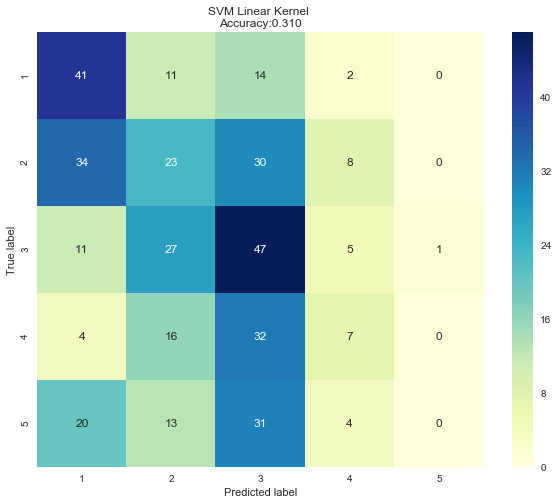

F1-Score:  0.25154043153854316
Precision:  0.24054168054168054
Recall:  0.2960348047817219


In [481]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

svm.predict(x_train)
y_pred = svm.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('F1-Score: ',f1_score(y_test, y_pred, average="macro"))
print('Precision: ',precision_score(y_test, y_pred, average="macro"))
print('Recall: ',recall_score(y_test, y_pred, average="macro"))

# plt.savefig('classifierMultiSvm.pdf')

In [441]:
#Code to print the feature weights

In [443]:
features_names = ['nextSent','shortSafe','intRep','partRep','extRep','respType']
df = pd.Series(abs(svm.coef_[0]), index=features_names).nlargest(6).plot(kind='barh')
df.plot()
plt.savefig('classifierMultiSvm_features.pdf')

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.22


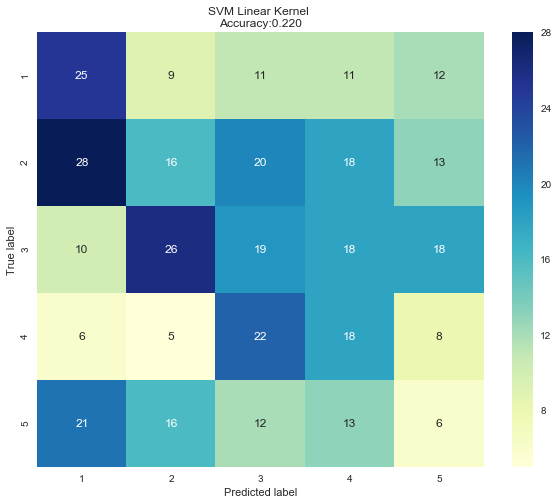

In [407]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf.predict(x_train)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# plt.savefig('classifierMultiDecisionTree.pdf')

Accuracy of LDA classifier on training set: 0.29
Accuracy of LDA classifier on test set: 0.27


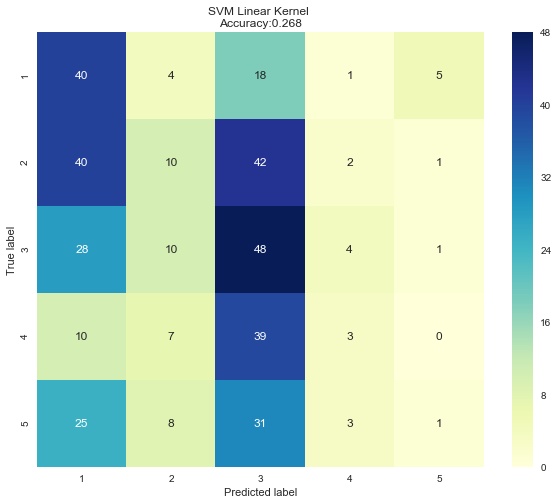

In [404]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

lda.predict(x_train)
y_pred = lda.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# plt.savefig('classifierMultiLinearDiscriminant.pdf')

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

pred = knn.predict(x_test)
print(x_test)
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))

Accuracy of K-NN classifier on training set: 0.51
Accuracy of K-NN classifier on test set: 0.29
      nextSentence  shortSafe  internalRepetition  partnerRepetition  \
829       1.596676        3.0                 0.1                0.0   
670       2.763436        6.0                 1.0                0.5   
1064      7.270165       16.0                 0.9                0.0   
85        4.109022       10.0                 0.7                0.0   
1813      5.394200        9.0                 0.8                0.0   
1148      1.317826        4.0                 0.2                0.0   
1726      6.619413       10.0                 1.5                0.7   
1070      7.427921        9.0                 0.6                0.1   
898       4.365451       13.0                 0.9                0.0   
175       3.059515        7.0                 0.5                0.0   
399       1.303806        2.0                 0.0                0.0   
871       9.586605       13.0           

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(rf.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.25


/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.31
Accuracy of Logistic regression classifier on test set: 0.25


### Multi - BLEU Results

In [410]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [411]:
data_raw = pd.read_csv('data/summer_wild_evaluation_dialogs_output.csv',
                       skiprows=1,
                       header=None,
                       names = ['id',
                                'bleu',
                                'nextSentence',
                                'shortSafe',
                                'internalRepetition',
                                'partnerRepetition',
                                'externalRepetition',
                                'responseType',
                                'evalScore'])

In [412]:
data = data_raw.drop(columns=['id','externalRepetition','nextSentence','internalRepetition','responseType','partnerRepetition','shortSafe'])
data.head()
data[:100]

,bleu,evalScore
0,0.153600,1
1,0.027625,2
2,0.263143,4
3,0.127400,2
4,0.150500,2
5,0.104857,3
6,0.100143,1
7,0.051750,2
8,0.328200,2
9,0.120600,1


In [368]:
x = data.drop(columns=['evalScore'])
y = data['evalScore']

In [369]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1522, 1), (1522,), (381, 1), (381,))

In [415]:
x = data.drop(columns=['evalScore'])
y = data['evalScore']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=0)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test, y_test)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

svm.predict(x_train)
y_pred = svm.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.show()
plt.savefig('bleuClassifierMultiSVM.pdf')


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_test, y_test)))

Accuracy of SVM classifier on training set: 0.28
Accuracy of SVM classifier on test set: 0.30
Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.25
Accuracy of LDA classifier on training set: 0.28
Accuracy of LDA classifier on test set: 0.31


#### Evaluation using NextSentence

In [2]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [5]:
data_raw = pd.read_csv('data/single_turn_evaluation_edited.csv',skiprows=1,header=None,names = ['id','statement','response','evalScore','bleuScore','nextSentence','internalRepetition','partnerRepetition','shortSafe'])

data = data_raw.drop(columns=['id','statement','response','bleuScore','internalRepetition','partnerRepetition','shortSafe'])
data.head()



,evalScore,nextSentence
0,3,0.302068
1,4,0.551756
2,3,0.047506
3,4,0.499853
4,4,0.795303


In [70]:
x = data.drop(columns=['evalScore'])
y = data['evalScore']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=0)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test, y_test)))

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_test, y_test)))

/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.47
Accuracy of SVM classifier on test set: 0.46
Accuracy of Decision Tree classifier on training set: 0.53
Accuracy of Decision Tree classifier on test set: 0.46
Accuracy of LDA classifier on training set: 0.48
Accuracy of LDA classifier on test set: 0.47


In [ ]:
#Experimenting to get ROC Curve

In [82]:
data_raw = pd.read_csv('data/summer_wild_evaluation_dialogs_output.csv',
                       skiprows=1,
                       header=None,
                       names = ['id',
                                'nextSentence',
                                'shortSafe',
                                'internalRepetition',
                                'partnerRepetition',
                                'externalRepetition',
                                'responseType',
                                'evalScore'])

data = data_raw.drop(columns=['id'])
data.head()
data[:100]

,nextSentence,shortSafe,internalRepetition,partnerRepetition,externalRepetition,responseType,evalScore
0,0.634341,5.0,0.220000,0.020000,0.020000,1,1
1,0.447612,8.0,0.075000,0.000000,0.000000,4,2
2,0.883641,7.0,0.100000,0.157143,0.014286,1,4
3,0.515186,4.0,0.240000,0.020000,0.000000,1,2
4,0.532331,6.0,0.366667,0.100000,0.066667,1,2
5,0.559871,7.0,0.114286,0.000000,0.000000,1,3
6,0.200378,7.0,0.000000,0.042857,0.014286,1,1
7,0.344483,8.0,0.012500,0.000000,0.000000,1,2
8,0.967223,5.0,0.120000,0.100000,0.040000,1,2
9,0.537125,10.0,0.020000,0.070000,0.020000,2,1


In [83]:
x = data.drop(columns=['evalScore'])
y = data['evalScore']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1522, 6), (1522,), (381, 6), (381,))

In [84]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set: 0.37
Accuracy of SVM classifier on test set: 0.31


/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [105]:
import sklearn.metrics as metrics
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
from sklearn.metrics import roc_auc_score


def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb.fit(y_test)

    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    return metrics.roc_curve(y_test, y_pred)

y_probas = svm.predict(x_test)
preds = y_probas


fpr, tpr, threshold = multiclass_roc_auc_score(y_test, preds)
# roc_auc = metrics.auc(fpr, tpr)


# import matplotlib.pyplot as plt
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [136]:
data_raw = pd.read_csv('data/summer_wild_evaluation_dialogs_output.csv',
                       skiprows=1,
                       header=None,
                       names = ['id',
                                'nextSentence',
                                'shortSafe',
                                'internalRepetition',
                                'partnerRepetition',
                                'externalRepetition',
                                'responseType',
                                'evalScore'])

data = data_raw.drop(columns=['id'])
data.head()
data[:100]

X = data.drop(columns=['evalScore'])
y = data['evalScore']

/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/keithvella/anaconda/lib/python3.6/si

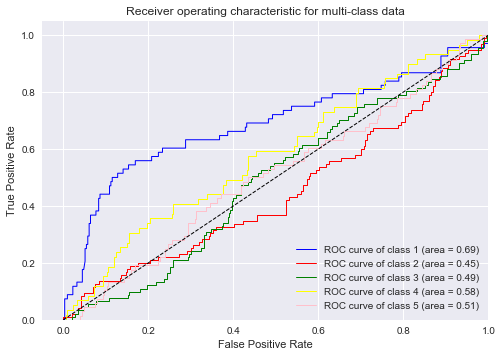

In [130]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
lw = 1


# Binarize the output
y = label_binarize(y, classes=[1,2,3,4,5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

classifier = OneVsRestClassifier(SVC(random_state=0, probability=True))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


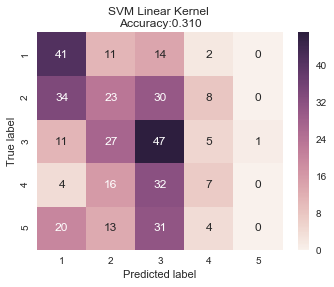

In [140]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

clf = SVC(probability=True).fit(X_train,y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

/Users/keithvella/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  # This is added back by InteractiveShellApp.init_path()
/Users/keithvella/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


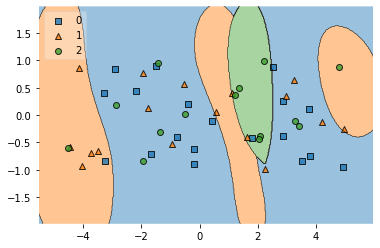

Text(0.5, 1.0, 'SVM Decision Region Boundary')

In [4]:
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


# Create arbitrary dataset for example
df = pd.DataFrame({'Planned_End': np.random.uniform(low=-5, high=5, size=50),
                   'Actual_End':  np.random.uniform(low=-1, high=1, size=50),
                   'Late':        np.random.random_integers(low=0,  high=2, size=50)}
)

# Fit Support Vector Machine Classifier
X = df[['Planned_End', 'Actual_End']]
y = df['Late']

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X.values, y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

plt.show()

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
